In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
import torch
from sd_pipeline import StableDiffusion3Pipeline
from sd_processor import JointAttnProcessor2_0

pipe = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3.5-medium", torch_dtype=torch.bfloat16)
pipe = pipe.to("cuda")

/home/wg25r/miniconda/envs/mochi/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 9/9 [00:02<00:00,  3.02it/s]


In [2]:
negative_prompt = "there are trees in the image"
pipe.tokenizer.tokenize(negative_prompt)
for block in pipe.transformer.transformer_blocks:
    block.attn.processor = JointAttnProcessor2_0()
    block.attn.processor.neg_prompt_len=len(pipe.tokenizer.tokenize(negative_prompt)) + 1

In [39]:
import os
import random
os.makedirs("random_sweeps", exist_ok=True)
negative_prompt = "cloud"

pipe.tokenizer.tokenize(negative_prompt)
for block in pipe.transformer.transformer_blocks:
    block.attn.processor = JointAttnProcessor2_0()
    block.attn.processor.neg_prompt_len=len(pipe.tokenizer.tokenize(negative_prompt)) + 1

# increase positive if it drops?/
images = pipe( 
    "a beautiful landscape in Kelowna, BC, Canada",
    negative_prompt=negative_prompt,
    num_inference_steps=40,
    avoidance_factor=3,
    guidance_scale=7.5,
    negative_offset=-1.6,
    return_steps=4,
    # generator=torch.manual_seed(2374),
).images

100%|██████████| 40/40 [00:24<00:00,  1.64it/s]


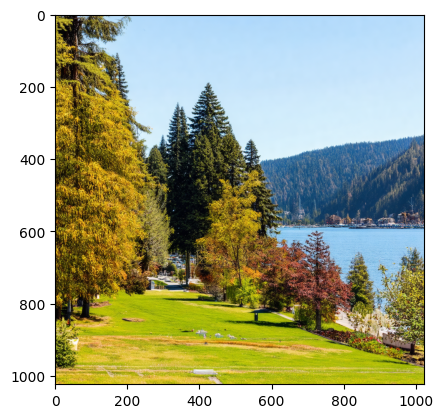

In [41]:
import pylab
pylab.imshow(images[-1])

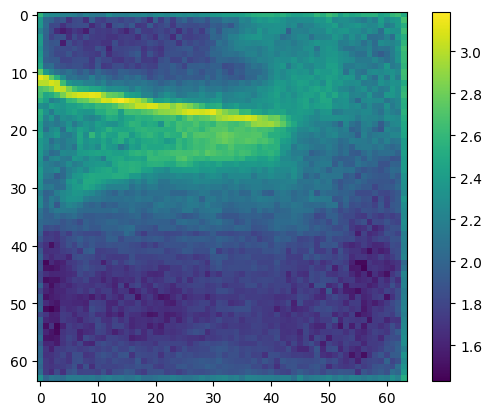

In [18]:
import pylab
map = (torch.stack(pipe.neg_maps))[8].mean((0,1,2,3)).reshape(64, 64).cpu().float().numpy()
pylab.imshow(map)
pylab.colorbar()

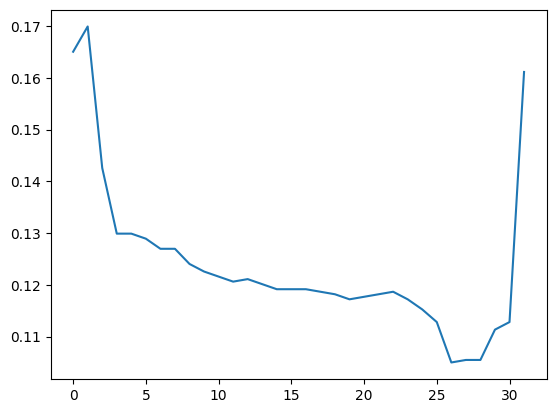

In [21]:
import pylab
line = (torch.stack(pipe.neg_maps)).mean((1,2,3,4,5)).cpu().float().numpy()
pylab.plot(line)

In [ ]:
import os
import random
import shutil
try:
    shutil.rmtree("random_sweeps2")
    print("Deleted previous random_sweeps2 directory")
except: 
    pass
os.makedirs("random_sweeps2", exist_ok=True)

# "a beautiful landscape in Canada",
# "a serene at sunset on land",
# "a mountain range",

prompts = [
    "Suburban neighborhood in the USA, detached single-family homes, neatly trimmed lawns, two-car garages, parked cars, sidewalks, mailboxes at the edge of driveways, clear blue sky, daytime, summer season",
]
# positive prompt cannot have no x

for i in range(100):
    af = random.uniform(0.5, 2)
    no = random.uniform(-4, 4)
    ws = random.uniform(0.1, 2)
    gc = random.uniform(3, 10)
    for j, prompt in enumerate(prompts):
        image = pipe(
            prompt=prompt,
            negative_prompt=negative_prompt,
            num_inference_steps=32,
            avoidance_factor=af,
            guidance_scale=gc,
            generator=torch.manual_seed(21), 
        ).images[0] 
        image.save(f"random_sweeps2/sweep_{i}_{j}.png")
        print(f"Saved random_sweep/sweep_{i}_{j}.png with af={af:.2f}, no={no:.2f}, gc={gc:.2f}, ws={ws:.2f}")

Deleted previous random_sweeps2 directory


100%|██████████| 32/32 [00:17<00:00,  1.79it/s]


Saved random_sweep/sweep_0_0.png with af=1.75, no=3.04, gc=7.15, ws=1.12


100%|██████████| 32/32 [00:17<00:00,  1.78it/s]


Saved random_sweep/sweep_1_0.png with af=1.32, no=0.94, gc=7.29, ws=0.28


100%|██████████| 32/32 [00:17<00:00,  1.78it/s]


Saved random_sweep/sweep_2_0.png with af=0.92, no=-1.99, gc=3.86, ws=1.72


100%|██████████| 32/32 [00:17<00:00,  1.78it/s]


Saved random_sweep/sweep_3_0.png with af=0.74, no=-2.97, gc=4.16, ws=0.10


100%|██████████| 32/32 [00:17<00:00,  1.78it/s]


Saved random_sweep/sweep_4_0.png with af=0.95, no=-1.46, gc=7.94, ws=1.64


100%|██████████| 32/32 [00:17<00:00,  1.78it/s]


Saved random_sweep/sweep_5_0.png with af=1.36, no=-0.34, gc=9.93, ws=0.95


100%|██████████| 32/32 [00:17<00:00,  1.78it/s]


Saved random_sweep/sweep_6_0.png with af=1.03, no=2.94, gc=8.91, ws=1.23


100%|██████████| 32/32 [00:17<00:00,  1.78it/s]


Saved random_sweep/sweep_7_0.png with af=1.98, no=1.44, gc=4.91, ws=0.61


100%|██████████| 32/32 [00:17<00:00,  1.79it/s]


Saved random_sweep/sweep_8_0.png with af=1.20, no=1.37, gc=4.11, ws=1.58


100%|██████████| 32/32 [00:17<00:00,  1.79it/s]


Saved random_sweep/sweep_9_0.png with af=1.82, no=0.12, gc=9.64, ws=0.93


100%|██████████| 32/32 [00:17<00:00,  1.80it/s]


Saved random_sweep/sweep_10_0.png with af=0.63, no=-0.17, gc=3.17, ws=1.80


100%|██████████| 32/32 [00:17<00:00,  1.80it/s]


Saved random_sweep/sweep_11_0.png with af=1.80, no=-2.90, gc=4.50, ws=1.38


100%|██████████| 32/32 [00:17<00:00,  1.81it/s]


Saved random_sweep/sweep_12_0.png with af=0.67, no=1.84, gc=9.52, ws=0.82


100%|██████████| 32/32 [00:17<00:00,  1.82it/s]


Saved random_sweep/sweep_13_0.png with af=1.23, no=-2.98, gc=6.34, ws=0.48


100%|██████████| 32/32 [00:17<00:00,  1.82it/s]


Saved random_sweep/sweep_14_0.png with af=1.38, no=-3.63, gc=8.94, ws=1.63


100%|██████████| 32/32 [00:17<00:00,  1.82it/s]


Saved random_sweep/sweep_15_0.png with af=1.06, no=-2.90, gc=4.96, ws=0.31


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_16_0.png with af=0.50, no=-2.00, gc=4.03, ws=1.20


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_17_0.png with af=1.62, no=-2.56, gc=7.92, ws=1.32


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_18_0.png with af=0.86, no=-2.46, gc=7.41, ws=1.24


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_19_0.png with af=0.99, no=-3.62, gc=6.09, ws=1.59


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_20_0.png with af=0.56, no=-3.29, gc=7.82, ws=1.13


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_21_0.png with af=0.51, no=-2.25, gc=8.78, ws=0.95


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_22_0.png with af=0.86, no=0.59, gc=6.52, ws=0.36


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_23_0.png with af=1.21, no=0.49, gc=8.36, ws=0.96


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_24_0.png with af=1.02, no=3.81, gc=9.34, ws=1.77


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_25_0.png with af=1.99, no=-0.23, gc=7.01, ws=1.78


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_26_0.png with af=1.30, no=-3.31, gc=4.84, ws=1.90


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_27_0.png with af=0.93, no=-1.76, gc=3.78, ws=1.00


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_28_0.png with af=1.61, no=-1.13, gc=7.65, ws=1.51


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_29_0.png with af=1.60, no=2.52, gc=3.53, ws=1.27


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_30_0.png with af=1.75, no=0.11, gc=7.49, ws=1.59


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_31_0.png with af=0.69, no=1.76, gc=4.58, ws=1.31


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_32_0.png with af=1.71, no=2.63, gc=9.49, ws=0.40


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_33_0.png with af=1.33, no=-0.31, gc=7.72, ws=0.40


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_34_0.png with af=0.61, no=-0.08, gc=5.30, ws=0.20


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_35_0.png with af=0.63, no=-3.03, gc=3.05, ws=0.38


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_36_0.png with af=1.37, no=-2.87, gc=4.78, ws=1.84


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_37_0.png with af=1.46, no=-2.40, gc=6.34, ws=1.27


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_38_0.png with af=0.98, no=-3.84, gc=9.61, ws=1.35


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_39_0.png with af=1.55, no=-2.66, gc=7.67, ws=0.42


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_40_0.png with af=0.75, no=-3.35, gc=4.07, ws=1.02


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_41_0.png with af=1.20, no=2.04, gc=7.73, ws=1.99


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_42_0.png with af=0.51, no=-0.67, gc=6.87, ws=0.63


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_43_0.png with af=1.66, no=3.08, gc=9.00, ws=1.76


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_44_0.png with af=0.90, no=1.13, gc=6.64, ws=1.47


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_45_0.png with af=0.76, no=2.39, gc=9.12, ws=0.61


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_46_0.png with af=1.10, no=1.42, gc=4.35, ws=0.97


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_47_0.png with af=0.76, no=-1.03, gc=7.47, ws=1.06


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_48_0.png with af=1.34, no=1.81, gc=7.39, ws=1.01


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_49_0.png with af=1.53, no=-0.20, gc=3.69, ws=0.60


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_50_0.png with af=1.45, no=2.26, gc=3.64, ws=0.20


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_51_0.png with af=1.18, no=0.06, gc=3.18, ws=0.55


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_52_0.png with af=1.42, no=2.96, gc=6.12, ws=0.22


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_53_0.png with af=1.72, no=0.01, gc=6.56, ws=0.37


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_54_0.png with af=1.30, no=-0.75, gc=5.68, ws=1.99


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_55_0.png with af=1.24, no=0.81, gc=9.95, ws=1.11


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_56_0.png with af=0.84, no=2.09, gc=4.13, ws=1.47


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_57_0.png with af=0.77, no=0.40, gc=5.80, ws=0.86


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_58_0.png with af=1.08, no=2.70, gc=8.32, ws=1.23


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_59_0.png with af=1.15, no=-1.94, gc=4.05, ws=0.80


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_60_0.png with af=0.69, no=-1.18, gc=9.30, ws=1.00


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_61_0.png with af=0.98, no=-3.66, gc=7.28, ws=1.29


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_62_0.png with af=1.73, no=-0.67, gc=7.55, ws=1.72


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_63_0.png with af=1.43, no=1.41, gc=3.34, ws=1.37


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_64_0.png with af=1.50, no=-3.04, gc=5.06, ws=0.59


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_65_0.png with af=0.91, no=0.13, gc=9.35, ws=1.47


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_66_0.png with af=1.90, no=-2.50, gc=4.75, ws=1.44


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_67_0.png with af=1.03, no=0.75, gc=8.88, ws=1.81


100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Saved random_sweep/sweep_68_0.png with af=0.81, no=-0.06, gc=6.56, ws=1.57


 69%|██████▉   | 22/32 [00:11<00:05,  1.82it/s]

In [ ]:
# show all images by concate them
import numpy as np
from PIL import Image
from PIL import ImageDraw

images = []
for j in range(2):
    row = []
    for i in range(10):
        image = Image.open(f"random_sweeps/sweep_{i}_{j}.png")
        row.append(np.array(image))
    
    images.append(np.concatenate(row, axis=1))
image = np.concatenate(images, axis=0)
Image.fromarray(image).save("sweeps.png")

    

100%|██████████| 16/16 [00:08<00:00,  1.94it/s]


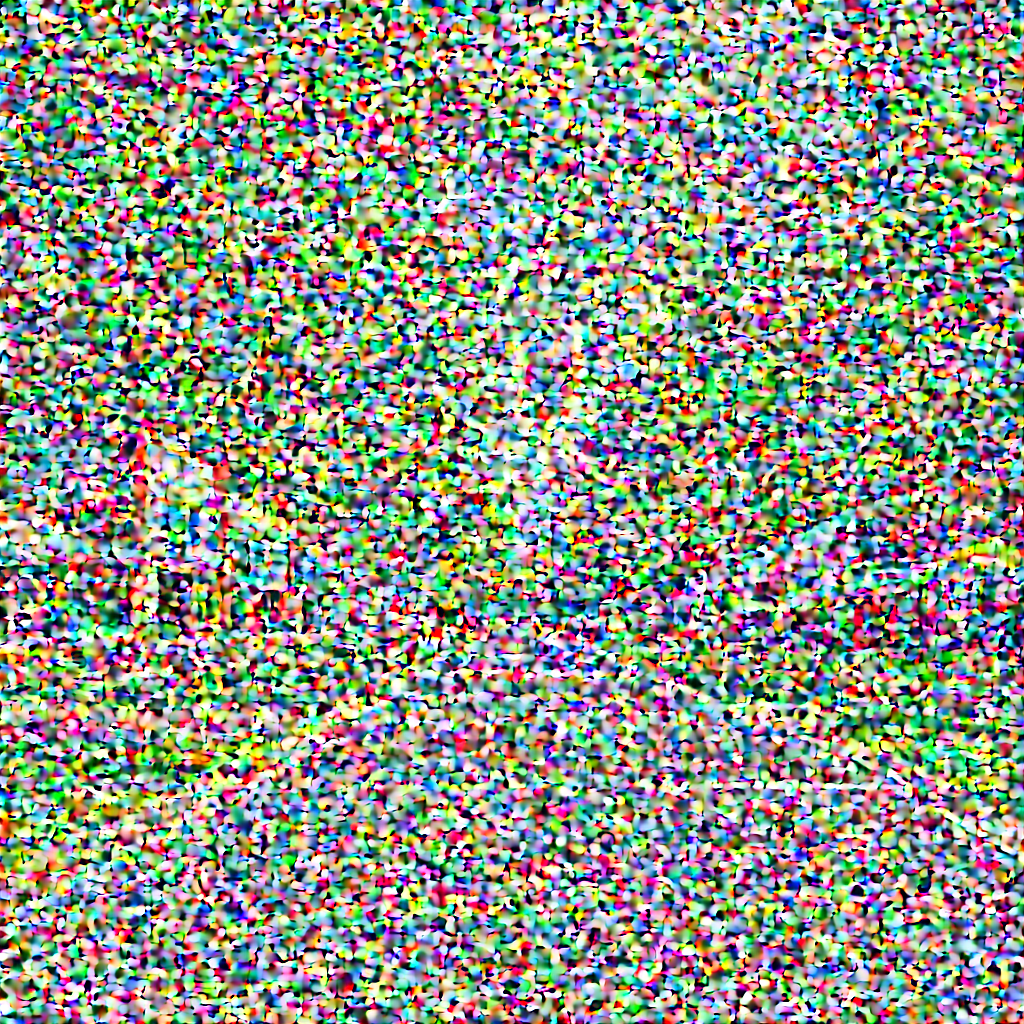

In [ ]:
import os
import random
os.makedirs("random_sweeps", exist_ok=True)
# not attening to tree why
negative_prompt = "there are trees in the image"
pipe.tokenizer.tokenize(negative_prompt)
for block in pipe.transformer.transformer_blocks:
    block.attn.processor = JointAttnProcessor2_0()
    block.attn.processor.neg_prompt_len=len(pipe.tokenizer.tokenize(negative_prompt)) + 1


image = pipe(
    "a US suburban street in the summer",
    negative_prompt=negative_prompt,
    num_inference_steps=16,
    avoidance_factor=0.5,
    guidance_scale=6,
    generator=torch.manual_seed(29),
).images[0] 
image

In [ ]:
torch.stack(pipe.neg_maps)[4].shape

torch.Size([24, 1, 24, 1, 4096])